# Investor Report : Video Game Industry
## <font color = 'purple'> Focusing on the US Market</font>
### Data Bootcamp Fall 19 Final Project
### By Aldo Gonzalez Aragon, Henry Brunngraber, Shinyoung Park
***

## Table of Contents

### 1. Introduction
    1.1. Purpose of Analysis
    1.2. Main Dataset Description

### 2. Overview of the Video Game Industry
    2.1. Industry Revenue at a Glance
    2.2. Genre Analysis
    2.3. Key Publishers

### 3. Industry Sales Performance Analysis
    3.1. Industry-wide Sales Trend over Time
    3.2. Volatility Analysis

### 4. Publisher Performance Analysis 
    4.1. EA
    4.2. Activision
    4.3. Ubisoft
    4.4. Take-Two

### 5. Conclusion

***

## 1. Introduction

### 1.1. Purpose of the Report

This project sets out to understand if video games are “recession proof.” Our intended user persona is an independent investor or a firm analyst looking to better understand the gaming industry. Ultimately, our project will help our user determine if video games are part of a recession investment strategy. We analyzed video game sales data across Japan, North America, and Europe to see sales trends and learn about the biggest publishers. We then focus on sales for Japan and the United States (using North America as a proxy as ~92% of “NA” sales come from the U.S.) against basic economic indicators for each country (GDP growth rates and unemployment rates). Finally, we focus on a key set of video game publishers listed on American exchanges (Take Two, Activision, Electronic Arts, and Ubisoft) and track their market performances against the S&P 500 Index. 

### 1.2. Main Dataset Description

In [466]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as smf
%matplotlib inline

In [467]:
data = pd.read_csv("vgsales.csv")
data.replace('\\N',np.nan)
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [468]:
data.shape

(16598, 11)

In [469]:
data.columns.to_list()

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [470]:
years = data['Year'].unique().tolist()
years.sort()

In [471]:
print(years)

[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan, 2016.0, 2017.0, 2020.0]


This dataset contains detailed sales data of **video games with sales greater than 100,000 copies** that were released between **1980 and 2020**. It only includes the physical copy sale of games(digital platforms excluded). It was retrieved from https://www.kaggle.com/gregorut/videogamesales.

The dataset includes **16598 games** with 11 fields for each game (Note: Same game on different platforms are represented as separate games)

Each column represents the following details for a game :

- **Rank** : Ranking of overall sales

- **Name** : The games name

- **Platform** : Platform of the games release (i.e. Wii, PS4, etc.)

- **Year** : Year of the game's release

- **Genre** : Genre of the game

- **Publisher** : Publisher of the game

- **NA_Sales** : Sales in North America (in millions)

- **EU_Sales** : Sales in Europe (in millions)

- **JP_Sales** : Sales in Japan (in millions)

- **Other_Sales** : Sales in the rest of the world (in millions)

- **Global_Sales** : Total worldwide sales.

## 2. Overview of the Video Game Industry

### 2. 1. Industry Revenue at a Glance

In [472]:
#The most recent year with full-year sales record
data15 = data.loc[data['Year']==2015,:]

In [473]:
data15.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,614.000000,614.0,614.000000,614.000000,614.000000,614.000000,614.000000
mean,9797.796417,2015.0,0.167459,0.159137,0.054919,0.048876,0.430684
std,5068.232870,0.0,0.468705,0.471293,0.188058,0.153484,1.066665
min,34.000000,2015.0,0.000000,0.000000,0.000000,0.000000,0.010000
25%,5176.250000,2015.0,0.000000,0.000000,0.000000,0.000000,0.030000
50%,11165.000000,2015.0,0.010000,0.030000,0.010000,0.010000,0.090000
75%,14288.250000,2015.0,0.127500,0.127500,0.050000,0.040000,0.367500
max,16568.000000,2015.0,5.770000,6.060000,2.780000,2.310000,14.240000


In [474]:
category = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
total_sales = []
for i in category:
    total = data15[i].sum()
    total_sales.append(total)

sales_2015 = pd.DataFrame({'Region': category,'total_sales':total_sales})
sales_2015

,Region,total_sales
0,NA_Sales,102.82
1,EU_Sales,97.71
2,JP_Sales,33.72
3,Other_Sales,30.01
4,Global_Sales,264.44


Text(0, 0.5, '(millions)')

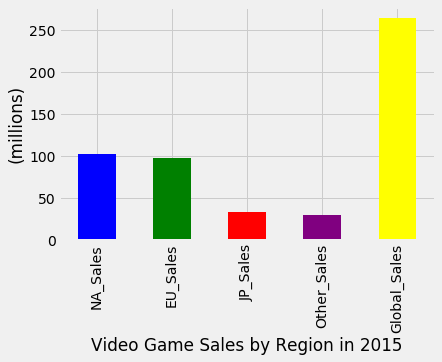

In [475]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()
sales_2015.set_index('Region')['total_sales'].plot.bar(ax = ax, color =['b','g','r','purple','yellow'])
ax.set_xlabel('Video Game Sales by Region in 2015')
ax.set_ylabel('(millions)')

The video game industry is a robust industry with global game sales of over **\\$264 million** in 2015. North American sales took up the largest part of total sales with the record of \\$102 million, EU sales being a close second. Although Japan's sales were relatively low at \\$33.72, it is still an impressive figure considering that it is a single country unlike North America and Europe. Note that this dataset does not include other sources of revenue from video games such as hardware sales and in-game purchases. Also, this only includes games that sold over 100,000 copies. Therefore, we can suspect that total revenues for the industry are much higher.

### 2. 2. Genre Analysis

This section provides a brief analysis of the game genres and their respective sales performances in the industry.

In [476]:
genres = data['Genre'].unique().tolist()
genres

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

Games in the dataset are categorized into 12 genres shown above.

#### Key Genres in the Industry

In [477]:
topgenres_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False).head()
topgenres_sales

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Name: Global_Sales, dtype: float64

Text(0.5, 0, 'Total Global Sales Share (%)')

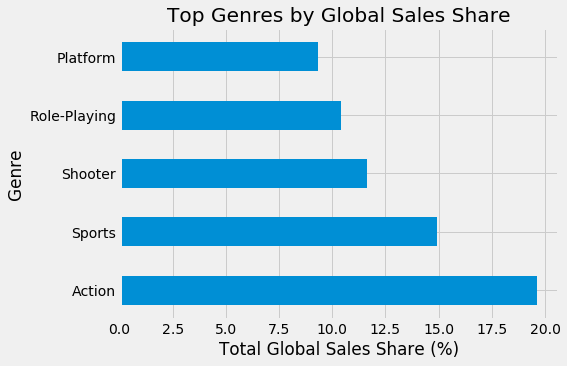

In [478]:
topgenres_share = (topgenres_sales/data['Global_Sales'].sum())*100

fig,ax = plt.subplots(figsize = (7,5))
topgenres_share.plot.barh(ax=ax)
ax.set_title('Top Genres by Global Sales Share')
ax.set_xlabel('Total Global Sales Share (%)')

In [479]:
(topgenres_sales.sum()/data['Global_Sales'].sum())*100

65.89607687513103

**Action, Sports, Shooter, Role-Playing and Platform** are the Top 5 genres based on their total global sales. Total sales of Action games amount to almost **\\$1.75 billion**, taking up close to **20%of total video game sales**. Total sales of the 5 genres add up to almost **66% of total sales over the years**.

Top games(by sales) for each key genre are the following :

In [480]:
genretops = []
for i in genres:
    example = data.loc[data['Genre'] == i,:].sort_values('Global_Sales', ascending = False).head()
    genretops.append(example)

**Sports** includes games such as Wii Sports and the FIFA series.

In [481]:
genretops[0]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49


**Platform** includes many of the Super Mario series games.

In [482]:
genretops[1]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14


The Pokemon series are the best-selling games in the **Role-Playing** genre.

In [483]:
genretops[3]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32


**Shooter** genre includes the Call of Duty series, one of the most popular video games. 

In [484]:
genretops[6]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03


The **Action** genre is represented by games such as the Grand Theft Auto series. 

In [485]:
genretops[8]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10


Text(0.5, 0, 'Year')

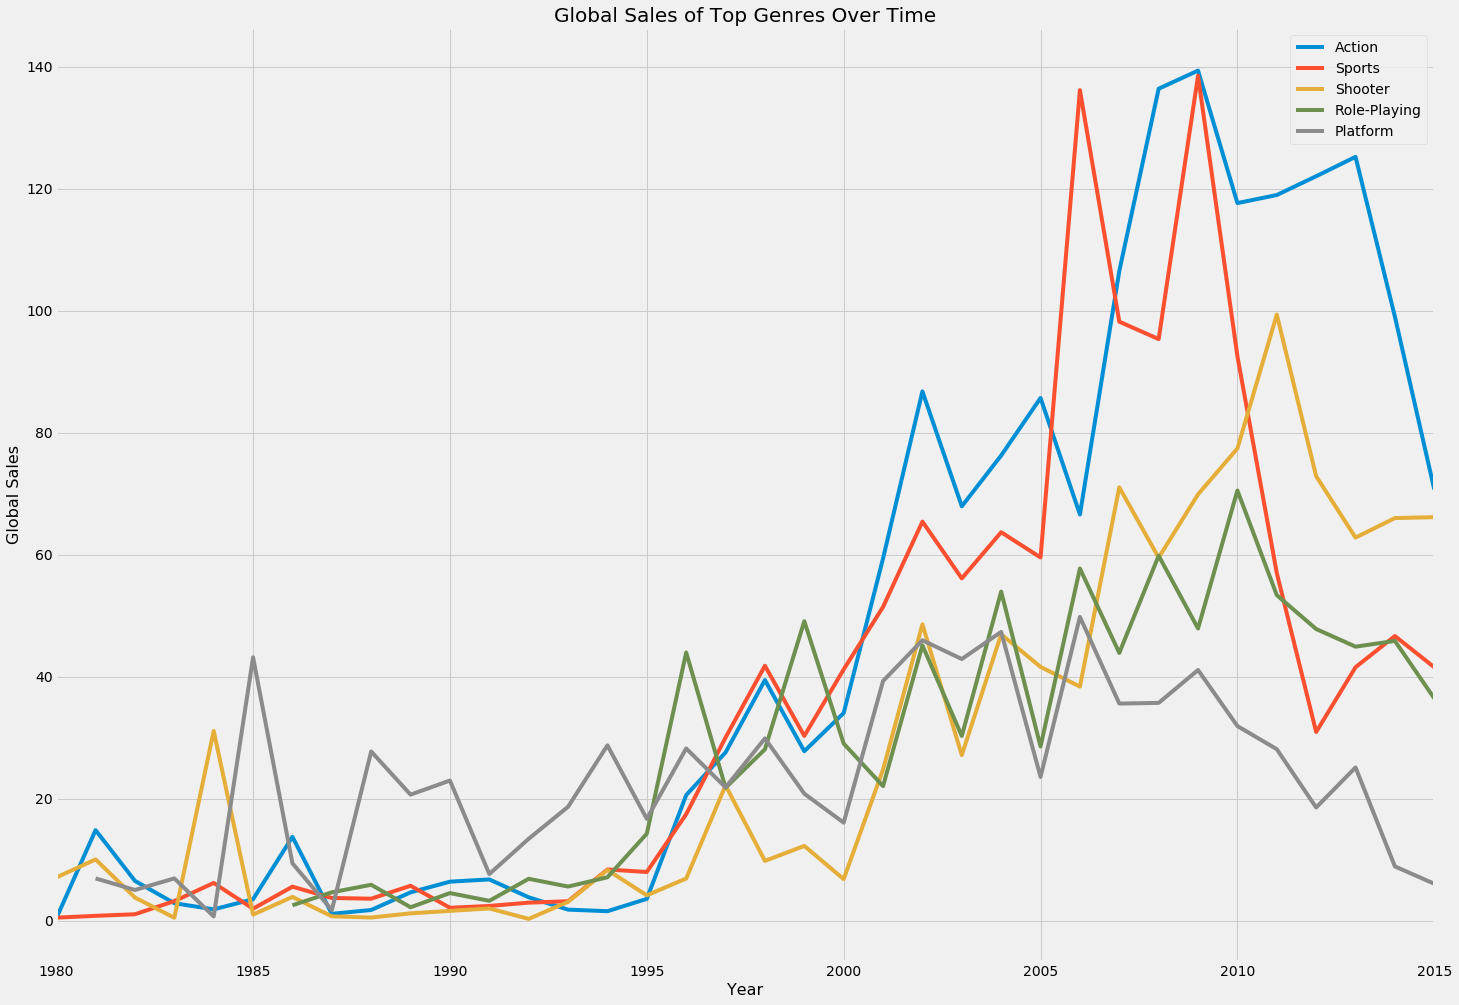

In [486]:
topgenres = topgenres_sales.reset_index()['Genre'].unique().tolist()

fig,ax = plt.subplots(figsize=(22,16))
dfh1 = data.loc[data['Year']<=2015,['Year','Genre','Global_Sales']].groupby(['Genre','Year'],as_index=False).sum()

for i in topgenres:
    dfh1[dfh1['Genre']==i].plot(x='Year',y='Global_Sales',label=i,ax=ax)

ax.set_title('Global Sales of Top Genres Over Time',fontsize=20)
ax.set_ylabel('Global Sales',fontsize=16)
ax.set_xlabel('Year',fontsize=16)

Across these top 5 genres, sales have increased dramatically since the year 2000 as games have increased in mainstream popularity. Action and Sports, however, have consistently dominated in sales throughout the years.

### 2.3. Key Publishers

In this section, we identify the best-performing publishers and present their basic sales statistics.

The top 10 publishers by total global sales are the following :

In [487]:
toppub = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False).head(10)
toppub

Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64

Text(0.5, 0, 'Total Global Sales Share (%)')

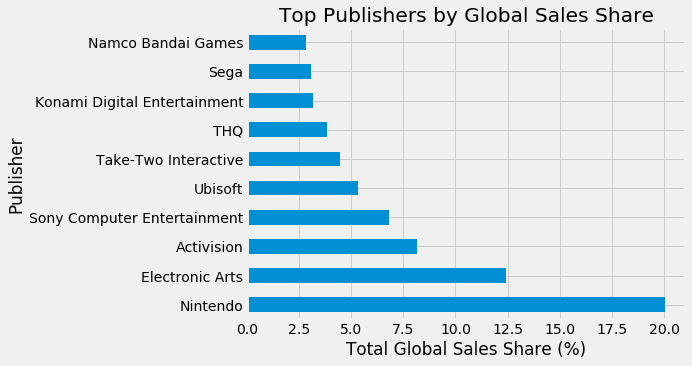

In [488]:
toppub_share = (toppub/data['Global_Sales'].sum())*100

fig,ax = plt.subplots(figsize = (7,5))
toppub_share.plot.barh(ax=ax)
ax.set_title('Top Publishers by Global Sales Share')
ax.set_xlabel('Total Global Sales Share (%)')

Other than Nintendo and Sony, which also produce their own respective platforms, the largest publishers are **EA, Activision, Ubisoft, Take-Two**.

## 3. Industry Sales Performance Analysis

### 3.1. Industry-wide Sales Trend over Time

Text(0.5, 1.0, 'Average sales over the course of years')

<Figure size 720x720 with 0 Axes>

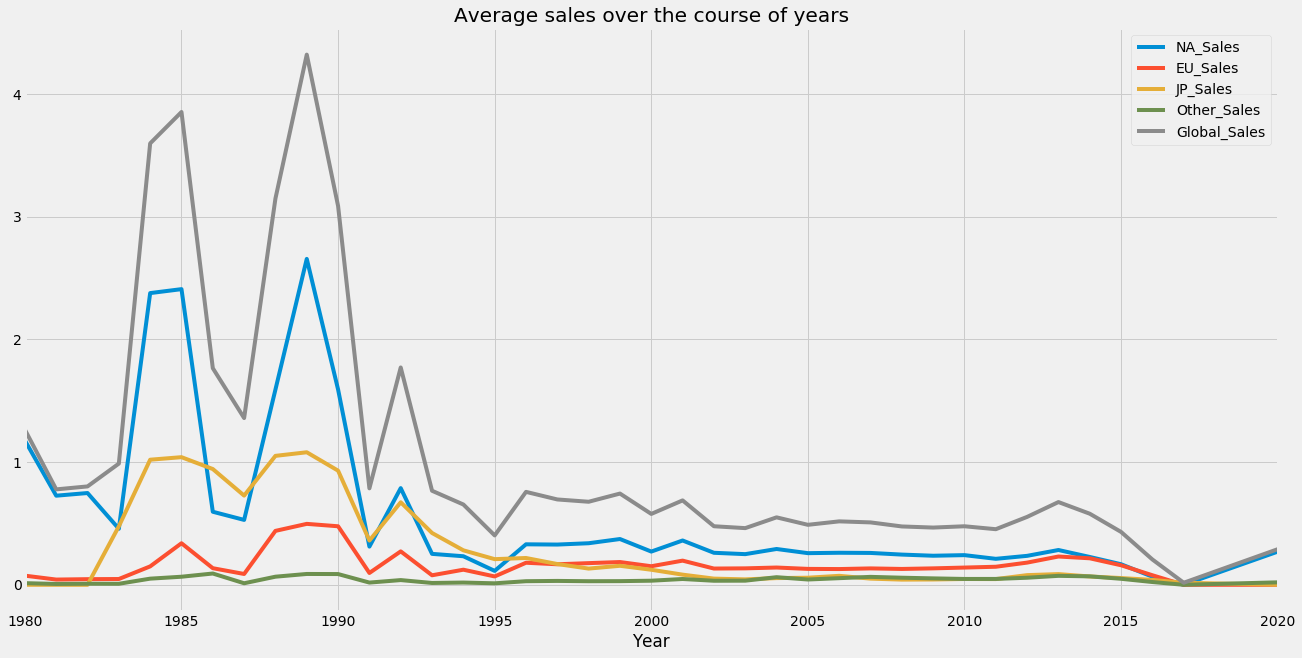

In [489]:
df1 = data.groupby(['Year'])
plt.figure(figsize=(10,10))
df1_mean = df1['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].aggregate(np.mean)
df1_mean.plot(figsize=(20,10))
plt.title('Average sales over the course of years')

Text(0.5, 1.0, 'Annual sales over the course of years')

<Figure size 720x720 with 0 Axes>

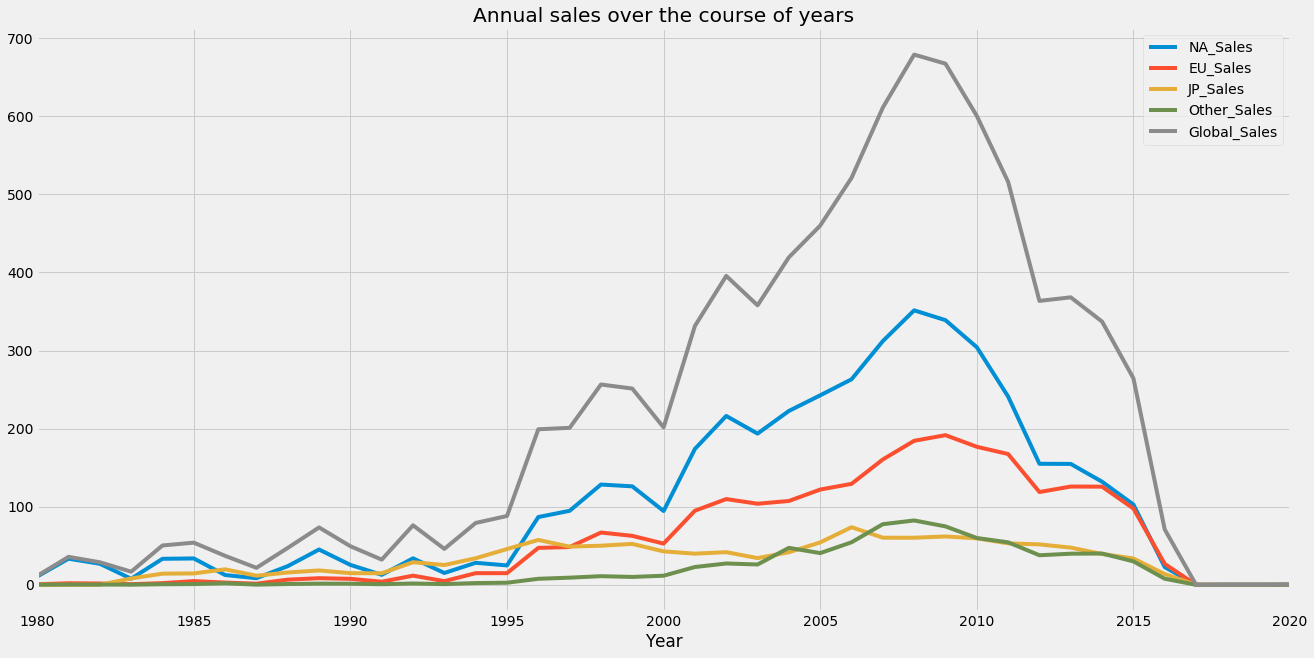

In [490]:
df1 = data.groupby(['Year'])
plt.figure(figsize=(10,10))
df1_sum = df1['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].aggregate(np.sum)
df1_sum.plot(figsize=(20,10))
plt.title('Annual sales over the course of years')

In [561]:
pd.set_option('display.max_columns', None)
data.groupby('Year').agg({'Global_Sales':'sum','Rank':'count'})

,Global_Sales,Rank
Year,,
1980.0,11.38,9
1981.0,35.77,46
1982.0,28.86,36
1983.0,16.79,17
1984.0,50.36,14
1985.0,53.94,14
1986.0,37.07,21
1987.0,21.74,16
1988.0,47.22,15


The dramatic rise in the number of released games per year has resulted in a **lower average of sales** compared to the pre-2000s era, but total game sales per region have nonetheless increased dramatically in line with the increasing number of games for sale over time.

While gaming grew in mainstream popularity throughout the 2000's, increasing numbers of digital game sales on home gaming consoles have resulted in a decline in phyisical game sales throughout the 2010's.

### 3. 2. Volatility Analysis

In this section, we analyze the elasticity of North American average game sales conditional on US GDP Growth.

In [493]:
us_gdp = pd.read_csv('USGDP.csv')

In [494]:
vg_fixed_years = data.loc[(data['Year']>=2000.0)&(data['Year']<=2015),:]

na_yearly_avgsales = vg_fixed_years.groupby('Year')['NA_Sales'].mean()


In [495]:
us_gdp['Year'] = us_gdp.DATE.str[:4]
us_gdp['Year'] = us_gdp['Year'].astype('int')
us_gdp = us_gdp.iloc[:16,:]
us_gdp_s = us_gdp['Year']
us_gdp.columns = ['Date','GDP','Year']
us_gdp_series = us_gdp['GDP']
us_gdp_sales = pd.DataFrame({'GDP': us_gdp_s.tolist(), 'avgsales': na_yearly_avgsales.tolist()})
reg_usgdp_sales = smf.ols('np.log(avgsales) ~ np.log(GDP)',us_gdp_sales).fit()
print(reg_usgdp_sales.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(avgsales)   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     12.21
Date:                Mon, 16 Dec 2019   Prob (F-statistic):            0.00358
Time:                        15:31:50   Log-Likelihood:                 11.979
No. Observations:                  16   AIC:                            -19.96
Df Residuals:                      14   BIC:                            -18.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     352.5165    101.298      3.480      

//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [496]:
reg_usgdp_sales2 = smf.ols('avgsales ~ GDP',us_gdp_sales).fit()
print(reg_usgdp_sales2.summary())

                            OLS Regression Results                            
Dep. Variable:               avgsales   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     11.28
Date:                Mon, 16 Dec 2019   Prob (F-statistic):            0.00469
Time:                        15:31:50   Log-Likelihood:                 33.704
No. Observations:                  16   AIC:                            -63.41
Df Residuals:                      14   BIC:                            -61.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7602      3.426      3.432      0.0

The first regression shows that the elasticity of North American video game sales against US GDP growth between 2000 and 2015 is negative. The coefficient of the second regression ($\beta_1$ = -0.0057) indicates that as US GDP growth increases by 1 percent(unit), the North American average sales decrease by 5700 dollars. The relationship is statistically significant at the 95% confidence level.

Such results suggest that video game sales may have a characteristic of an inferior good. However, we cannot be entirely conclusive as other factors, such as increasing popularity of digital game sales, may be affecting the sales numbers in the dataset. 

## 4. Publisher Performance Analysis

In this section, we conduct a detailed analysis on some of key publishers that we identified in 2.3. We will be focusing on **Electronic Arts, Activision, Ubisoft and Take-Two**, which are all public companies traded in the US stock market.

In [510]:
keypub = ['Electronic Arts','Activision','Ubisoft','Take-Two Interactive']

keypubdata = data.loc[data['Publisher'].isin(keypub),]

Text(0.5, 0, 'Global Sales (millions)')

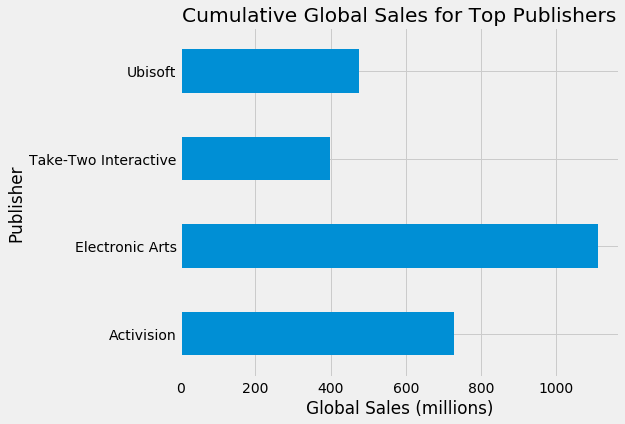

In [526]:
fig,ax = plt.subplots()
keypubdata.groupby('Publisher')['Global_Sales'].sum().plot.barh(ax=ax, figsize = (7, 6))
ax.set_title('Cumulative Global Sales for Top Publishers')
ax.set_xlabel('Global Sales (millions)')

Amongst top publishers, **EA** leads in global sales to date.

Now we will look into the leading products, sales trends and finally the stock price volatility against the S&P 500 Index for each publisher.

The S&P 500 index data was retrieved from https://finance.yahoo.com/quote/%5EGSPC/history/. The dataset includes monthly prices of the index.

In [528]:
sp500_long = pd.read_csv('sp500total.csv')
sp500_long = sp500_long.rename(columns = {'Close' : 'sp500_close'})

**Electronic Arts**

In [529]:
ea = data.loc[data['Publisher']=='Electronic Arts',:]
ea.sort_values('Global_Sales',ascending = False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
103,104,Battlefield 3,PS3,2011.0,Shooter,Electronic Arts,2.85,2.93,0.35,1.10,7.23
104,105,Need for Speed Underground,PS2,2003.0,Racing,Electronic Arts,3.27,2.83,0.08,1.02,7.20
112,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
113,114,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90
114,115,Medal of Honor: Frontline,PS2,2002.0,Shooter,Electronic Arts,2.93,2.75,0.17,0.99,6.83


Popular franchises in top genres like sports, action, and shooters helps EA outperform its peers. In particular, FIFA as an annual franchise performs well in Europe and North America. 

Text(0.5, 1.0, 'Annual sales over the course of years for EA')

<Figure size 720x720 with 0 Axes>

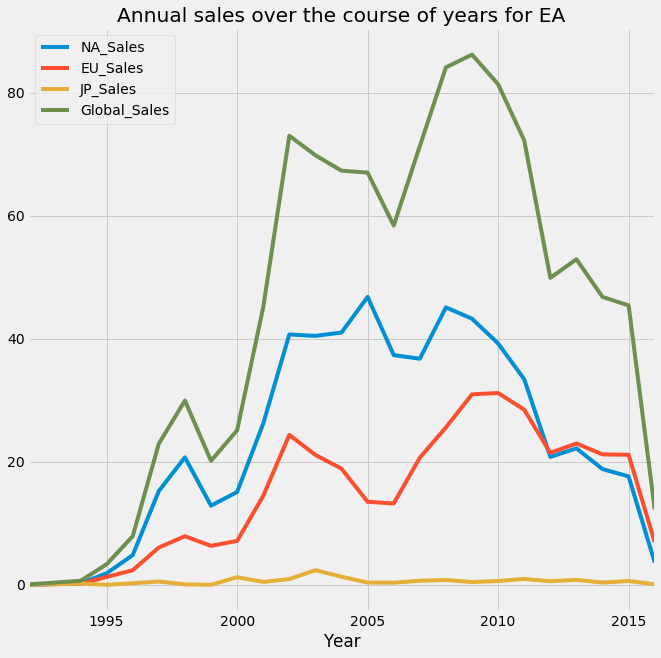

In [530]:
plt.style.use('fivethirtyeight')
eaplot = ea.groupby(['Year'])
plt.figure(figsize=(10,10))
eaplot_sum = eaplot['NA_Sales','EU_Sales','JP_Sales','Global_Sales'].aggregate(np.sum)
eaplot_sum.plot(figsize=(10,10))
plt.title('Annual sales over the course of years for EA')

EA has been a strong global performer throughout the 2000s. North American sales are boosted by another annual franchise, Madden. 

In [531]:
ea = pd.read_csv('EA.csv')
ea = ea.rename(columns = {'Close':'ea_close'})

ea_merge = ea.merge(sp500_long, how='left', on='Date')
ea_merge.head()

ea_reg = smf.ols('np.log(ea_close) ~ np.log(sp500_close)', ea_merge).fit()
print(ea_reg.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(ea_close)   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     1445.
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          1.95e-128
Time:                        15:51:47   Log-Likelihood:                -314.45
No. Observations:                 364   AIC:                             632.9
Df Residuals:                     362   BIC:                             640.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -10.6834    

This regression result indicates that EA's stock price elasticity against the S&P 500 Index ($\beta_1$) is positive, with a significant p-value close to zero. This means that EA's share prices are more likely to rise with the overall stock market, but also more likely to decline with the market.

**Activision**

In [555]:
activision = data.loc[data['Publisher']=='Activision',:]
activision.sort_values('Global_Sales',ascending = False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
36,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
55,56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
61,62,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.72,2.63,0.04,0.82,10.21


The Call of Duty franchise is the most successful franchise of Activision by far.

Text(0.5, 1.0, 'Annual sales over the course of years for Activision')

<Figure size 720x720 with 0 Axes>

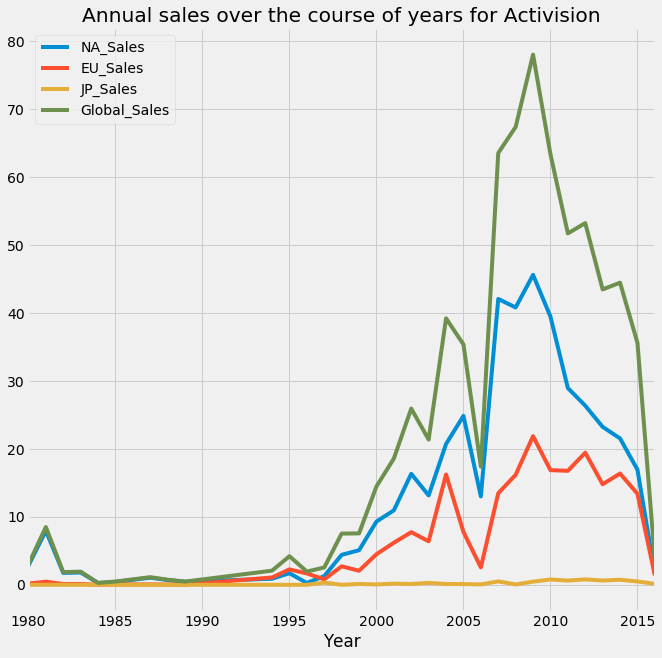

In [536]:
plt.style.use('fivethirtyeight')
aplot = activision.groupby(['Year'])
plt.figure(figsize=(10,10))
aplot_sum = aplot['NA_Sales','EU_Sales','JP_Sales','Global_Sales'].aggregate(np.sum)
aplot_sum.plot(figsize=(10,10))
plt.title('Annual sales over the course of years for Activision')

While posessing a number of strong franchises, the disproportionate success of the Call of Duty franchise resulted in a peak in Activision's sales during the early to mid 2010's.

In [556]:
activision2 = pd.read_csv('ATVI.csv')
activision2 = activision2.rename(columns = {'Close' : 'atvi_close'})
activision_merge = activision2.merge(sp500_long, how='left', on='Date')
activision_merge.head()
activision_reg = smf.ols('np.log(atvi_close) ~ np.log(sp500_close)', activision_merge).fit()
print(activision_reg.summary())

                            OLS Regression Results                            
Dep. Variable:     np.log(atvi_close)   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     670.0
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           8.96e-80
Time:                        16:53:46   Log-Likelihood:                -384.24
No. Observations:                 315   AIC:                             772.5
Df Residuals:                     313   BIC:                             780.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -16.9915    

Activision's stock price elasticity is also positive with a significant p-value. The elasticity of 2.63 indicates that Activision's share prices may be more sensitive to the stock market compared to EA's(1.95). 

**Ubisoft**

In [557]:
ubisoft = data.loc[data['Publisher']=='Ubisoft',:]
ubisoft.sort_values('Global_Sales',ascending = False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26
68,69,Just Dance 2,Wii,2010.0,Misc,Ubisoft,5.84,2.89,0.01,0.78,9.52
102,103,Just Dance,Wii,2009.0,Misc,Ubisoft,3.51,3.03,0.00,0.73,7.27
111,112,Just Dance 4,Wii,2012.0,Misc,Ubisoft,4.14,2.21,0.00,0.56,6.91
128,129,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2.56,0.16,1.14,6.50
156,157,Assassin's Creed II,PS3,2009.0,Action,Ubisoft,2.54,1.95,0.21,0.87,5.57
158,159,Assassin's Creed,X360,2007.0,Adventure,Ubisoft,3.28,1.65,0.07,0.55,5.55
172,173,Assassin's Creed III,X360,2012.0,Action,Ubisoft,3.13,1.71,0.03,0.44,5.30
176,177,Assassin's Creed II,X360,2009.0,Action,Ubisoft,3.10,1.56,0.08,0.51,5.27
218,219,Assassin's Creed,PS3,2007.0,Adventure,Ubisoft,1.91,2.00,0.09,0.83,4.83


Ubisoft's two most successful franchises are Just Dance and Assassin's Creed.

Text(0.5, 1.0, 'Annual sales over the course of years for Ubisoft')

<Figure size 720x720 with 0 Axes>

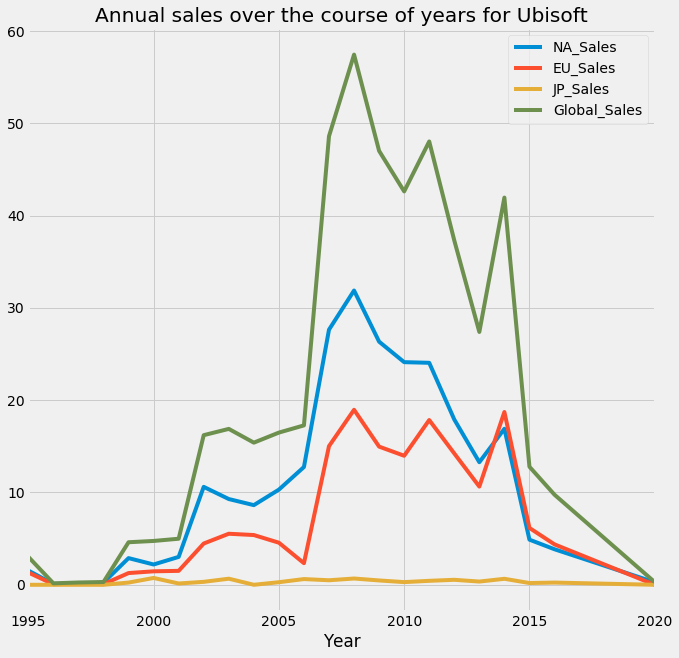

In [558]:
plt.style.use('fivethirtyeight')
uplot = ubisoft.groupby(['Year'])
plt.figure(figsize=(10,10))
uplot_sum = uplot['NA_Sales','EU_Sales','JP_Sales','Global_Sales'].aggregate(np.sum)
uplot_sum.plot(figsize=(10,10))
plt.title('Annual sales over the course of years for Ubisoft')

Ubisoft's total sales have declined to a greater degree than Activision and EA as its two largest franchines, Just Dance and Assasin's Creed, have declined in popularity since 2000. Interestingly, this peak in sales took place during the Great Recession. Also, there has been a general gap between the NA sales and the EU Sales while showing similar trends, However, starting around 2013, the two regional figures seem to be converging.

In [562]:
ubi_price = pd.read_csv('UbisoftPriceHistory.csv')

ubi_price = ubi_price.rename(columns = {'Close' : 'ubi_close'})

ubi_merge = ubi_price.merge(sp500_long, how='left', on='Date')
ubi_merge.head()
ubi_reg = smf.ols('np.log(ubi_close) ~ np.log(sp500_close)', ubi_merge).fit()
print(ubi_reg.summary())


                            OLS Regression Results                            
Dep. Variable:      np.log(ubi_close)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     660.9
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           3.49e-50
Time:                        22:17:22   Log-Likelihood:                -42.725
No. Observations:                 120   AIC:                             89.45
Df Residuals:                     118   BIC:                             95.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -16.6497    

Ubisoft's stock price elasticity is positive(2.625). The level of elasticity is fairly similar to that of Activision. 

**Take-Two**

In [550]:
take2 = data.loc[data['Publisher']=='Take-Two Interactive',:]
take2.sort_values('Global_Sales',ascending = False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
90,91,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
123,124,Red Dead Redemption,PS3,2010.0,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60


The biggest franchise of Take-Two by far is Grand Theft Auto.

Text(0.5, 1.0, 'Annual sales over the course of years for Take-Two')

<Figure size 720x720 with 0 Axes>

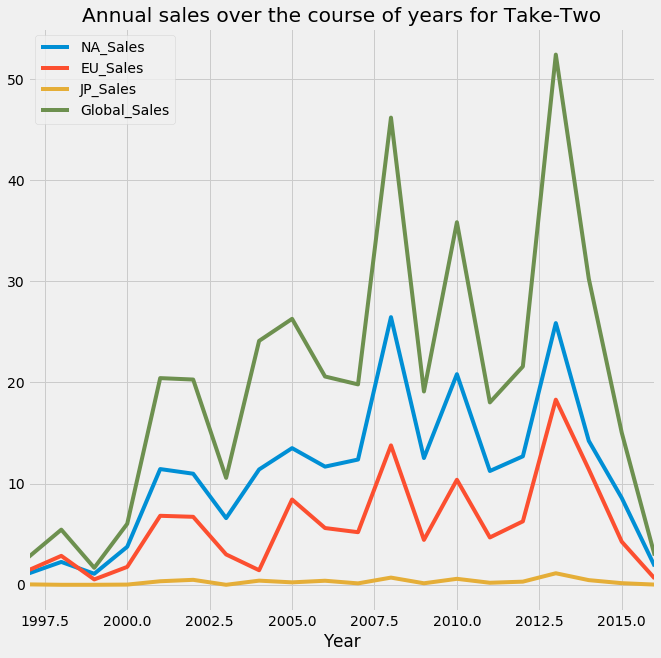

In [551]:
takeplot = take2.groupby(['Year'])
plt.figure(figsize=(10,10))
takeplot_sum = takeplot['NA_Sales','EU_Sales','JP_Sales','Global_Sales'].aggregate(np.sum)
takeplot_sum.plot(figsize=(10,10))
plt.title('Annual sales over the course of years for Take-Two')

Take-Two's annual sales figures are highly dependent on Grand Theft Auto. While GTA sells as well as FIFA from EA, it is not released on an annual bases, meaning investors cannot expect consistency in annual sales revenue.

In [563]:
taketwo = pd.read_csv('TTWO.csv')
taketwo = taketwo.rename(columns = {'Close':'taketwo_close'})

taketwo_merge = taketwo.merge(sp500_long, how='left', on='Date')
# taketwo_merge.head()

taketwo_reg = smf.ols('np.log(taketwo_close) ~ np.log(sp500_close)', taketwo_merge).fit()
print(taketwo_reg.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log(taketwo_close)   R-squared:                       0.656
Model:                               OLS   Adj. R-squared:                  0.655
Method:                    Least Squares   F-statistic:                     516.6
Date:                   Mon, 16 Dec 2019   Prob (F-statistic):           9.85e-65
Time:                           22:19:51   Log-Likelihood:                -203.07
No. Observations:                    273   AIC:                             410.1
Df Residuals:                        271   BIC:                             417.4
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Inte

Like the other 3 publishers, Take-Two's share prices changes are positively correlated with the overall stock market changes. Its level of elasticity is close to EA's.

## 5. Conclusion

Our analyses of potential investment opportunities in the video game industry can be concluded as follows:
- Videos games overall appear to posess the qualities of the inferior good, suggesting video game sales fluctuate on an anti-cyclical basis compared to the economy as a whole
- While video game sales are possibly "recession proof" in this regard, the stock prices of the four major publishers we anlayzed correlate positively to changes in the overall market suggesting sales figures alone due not drive the variability in publisher's stock prices
- Amongst these publishers, EA showed the lowest correlation to overall market trends while posting high sales figures from multiple annual franchises across several generes, suggesting it is the most promising long-term amongst the four major publishers

For future analyses:

While physical games sales are still the primary driver of industry sales, this analyses excluded the impact of increasingly prevalent digital distribution models. Additional insight may be gathered from analyzing the role of digital sales as they relate to nascent industry trends, including free-to-play titles and in-game-purchase-based revenue models, as they grow in popularity in the coming years.